# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# loading dataset

In [2]:
df = pd.read_csv('walmart_data.txt')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Checking shape of dataframe

In [3]:
df.shape

(550068, 10)

# Checking column datatype and info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Statistical summary of numeracial coulmns

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


# Checking for missing values 
# dataset has zero missing values

In [6]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Checking correlation between columns
# strong relation is not present between any two columns

<AxesSubplot:>

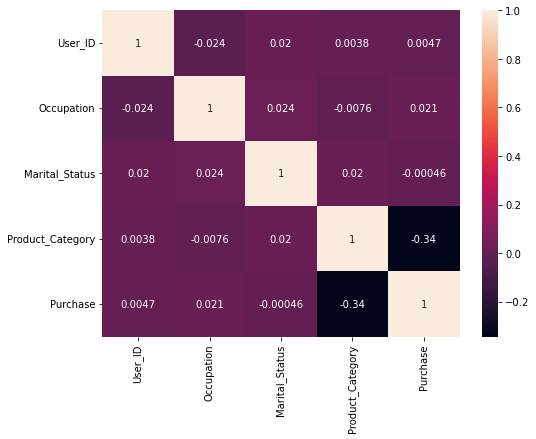

In [7]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True)

In [8]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

# Renaming stay_in_current_city_years to staying_years 

In [9]:
df.rename({'Stay_In_Current_City_Years':'staying_for_years'},axis = 1,inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,staying_for_years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Checking fot outliers in Purchase 
# Purchase columns has sum outliers 

<AxesSubplot:ylabel='Purchase'>

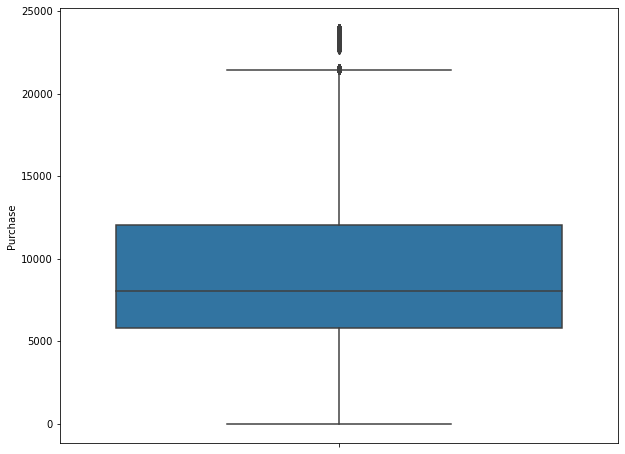

In [10]:
plt.figure(figsize = (10,8))
sns.boxplot(y = df['Purchase'])

# Count of customer based on Gender and Marital Status
# Insights
## Men are more likly to do online shopping and being it men or women singles are mofre buying if compared with married

C:\Users\Manish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

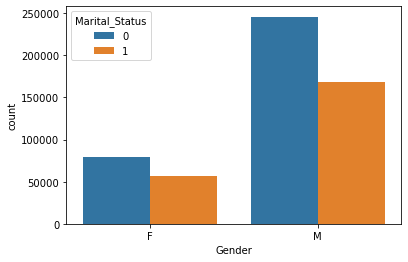

In [11]:
sns.countplot('Gender',hue = 'Marital_Status', data =df)

# Sum of purchase amount based on Gender

In [12]:
a = df.groupby(['Gender'])['Purchase'].sum().reset_index()

([<matplotlib.patches.Wedge at 0x121729e1400>,
 [Text(0.8187242411952669, 0.7346363841243058, 'F'),
  Text(-0.818724206804455, -0.7346364224515527, 'M')])

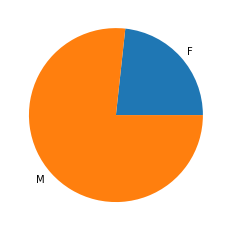

In [13]:
plt.pie(x = a['Purchase'], labels= a['Gender'])

# It can be seen that people of age between 26-35 are more active buyers 

<AxesSubplot:xlabel='Age', ylabel='Count'>

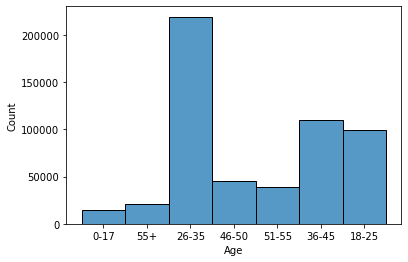

In [14]:
sns.histplot(df['Age'], bins = 20)

# which product category is more popular
# Insight
## It can be seen from below grapgh that product category 1 & 5 are most popular among all products

C:\Users\Manish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

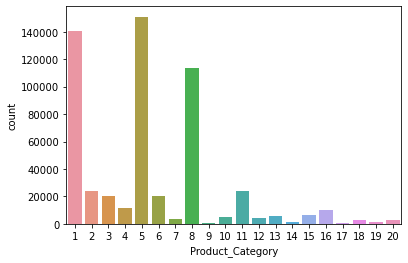

In [15]:
sns.countplot(df['Product_Category'])

# Product Category 1 contributes in maximum purchase amount

In [16]:
b = df.groupby(['Product_Category'])['Purchase'].sum().sort_values().reset_index()

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

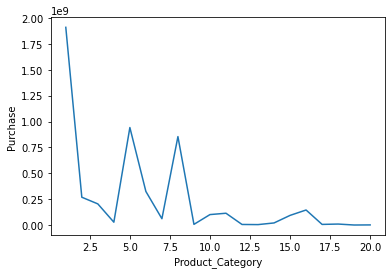

In [17]:
sns.lineplot(x = b['Product_Category'], y = b['Purchase'])

# Count of customers based on Staying year in a city and City Category
# Insights
## People staying for 1 year and people who are from B category city has more purchases 

C:\Users\Manish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='staying_for_years', ylabel='count'>

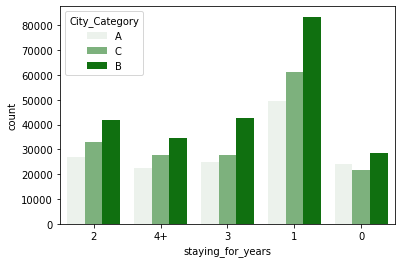

In [18]:
sns.countplot(df['staying_for_years'],hue = df['City_Category'], color = 'green')

In [19]:
d = df.groupby(['User_ID','Gender'])['Purchase'].sum().sort_values(ascending = False).reset_index()[:11]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1000424'),
  Text(1, 0, '1000549'),
  Text(2, 0, '1001015'),
  Text(3, 0, '1001181'),
  Text(4, 0, '1001680'),
  Text(5, 0, '1001941'),
  Text(6, 0, '1002909'),
  Text(7, 0, '1003391'),
  Text(8, 0, '1004277'),
  Text(9, 0, '1004448'),
  Text(10, 0, '1005831')])

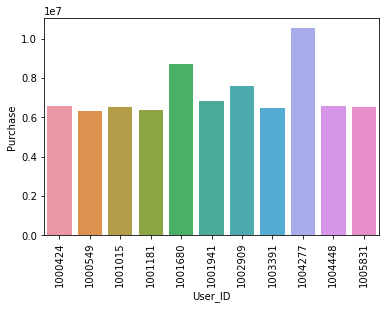

In [20]:
sns.barplot(x = d['User_ID'],y = d['Purchase'])
plt.xticks(rotation=90)

# Average Mean of sample of 1000 is near to population mean 

In [21]:
male_expense_mean = df[df['Gender'] == 'M']

In [22]:
sample = 1000
n = 1000
male_means = []
for i in range(n):
    male_mean = male_expense_mean.sample(sample, replace = True)['Purchase'].mean()
    male_means.append(male_mean)

(array([ 2.,  0.,  0.,  0.,  2.,  3.,  4.,  4., 11., 16., 26., 23., 33.,
        44., 67., 62., 60., 60., 75., 69., 61., 62., 76., 48., 50., 29.,
        30., 21., 19., 13., 11.,  9.,  4.,  4.,  2.]),
 array([8885.563     , 8914.18411429, 8942.80522857, 8971.42634286,
        9000.04745714, 9028.66857143, 9057.28968571, 9085.9108    ,
        9114.53191429, 9143.15302857, 9171.77414286, 9200.39525714,
        9229.01637143, 9257.63748571, 9286.2586    , 9314.87971429,
        9343.50082857, 9372.12194286, 9400.74305714, 9429.36417143,
        9457.98528571, 9486.6064    , 9515.22751429, 9543.84862857,
        9572.46974286, 9601.09085714, 9629.71197143, 9658.33308571,
        9686.9542    , 9715.57531429, 9744.19642857, 9772.81754286,
        9801.43865714, 9830.05977143, 9858.68088571, 9887.302     ]),
 <BarContainer object of 35 artists>)

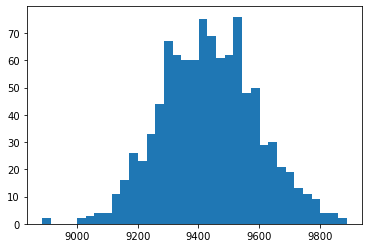

In [23]:
plt.hist(male_means, bins=35)

# Average Mean of sample of 10000 Female is near to population mean

(array([  1.,   1.,   4.,  12.,  13.,  19.,  38.,  72., 119., 172., 252.,
        331., 466., 573., 671., 779., 820., 825., 918., 787., 717., 647.,
        501., 393., 306., 207., 155.,  91.,  59.,  29.,  15.,   4.,   1.,
          1.,   1.]),
 array([8548.2342 , 8558.73152, 8569.22884, 8579.72616, 8590.22348,
        8600.7208 , 8611.21812, 8621.71544, 8632.21276, 8642.71008,
        8653.2074 , 8663.70472, 8674.20204, 8684.69936, 8695.19668,
        8705.694  , 8716.19132, 8726.68864, 8737.18596, 8747.68328,
        8758.1806 , 8768.67792, 8779.17524, 8789.67256, 8800.16988,
        8810.6672 , 8821.16452, 8831.66184, 8842.15916, 8852.65648,
        8863.1538 , 8873.65112, 8884.14844, 8894.64576, 8905.14308,
        8915.6404 ]),
 <BarContainer object of 35 artists>)

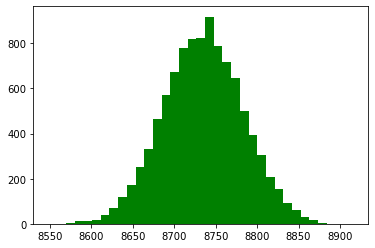

In [27]:
female_expense_mean = df[df['Gender'] == 'F']
sample = 10000
n = 10000
female_means = []
for i in range(n):
    female_mean = female_expense_mean.sample(sample, replace = True)['Purchase'].mean()
    female_means.append(female_mean)
plt.hist(female_means, bins=35, color = 'green')

# Sample mean of Married and single are near Population mean

(array([  1.,   0.,   1.,   3.,   6.,   9.,  16.,  22.,  64.,  95., 153.,
        243., 295., 435., 562., 718., 827., 845., 975., 911., 874., 803.,
        602., 488., 385., 255., 149., 113.,  53.,  51.,  26.,   6.,  10.,
          3.,   1.]),
 array([9042.9715    , 9054.67714857, 9066.38279714, 9078.08844571,
        9089.79409429, 9101.49974286, 9113.20539143, 9124.91104   ,
        9136.61668857, 9148.32233714, 9160.02798571, 9171.73363429,
        9183.43928286, 9195.14493143, 9206.85058   , 9218.55622857,
        9230.26187714, 9241.96752571, 9253.67317429, 9265.37882286,
        9277.08447143, 9288.79012   , 9300.49576857, 9312.20141714,
        9323.90706571, 9335.61271429, 9347.31836286, 9359.02401143,
        9370.72966   , 9382.43530857, 9394.14095714, 9405.84660571,
        9417.55225429, 9429.25790286, 9440.96355143, 9452.6692    ]),
 <BarContainer object of 35 artists>)

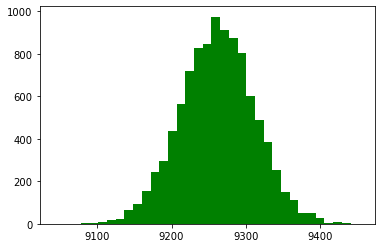

In [28]:
married_expense_mean = df[df['Marital_Status'] == 1]
sample = 10000
n = 10000
married_means = []
for i in range(n):
    married_mean = married_expense_mean.sample(sample, replace = True)['Purchase'].mean()
    married_means.append(married_mean)
plt.hist(married_means, bins=35, color = 'green')

(array([  1.,   6.,   5.,  16.,  25.,  42.,  70., 103., 161., 266., 366.,
        495., 613., 811., 872., 884., 928., 860., 802., 687., 595., 462.,
        324., 202., 163.,  98.,  66.,  43.,  16.,  11.,   3.,   2.,   1.,
          0.,   1.]),
 array([9075.5192    , 9087.16177143, 9098.80434286, 9110.44691429,
        9122.08948571, 9133.73205714, 9145.37462857, 9157.0172    ,
        9168.65977143, 9180.30234286, 9191.94491429, 9203.58748571,
        9215.23005714, 9226.87262857, 9238.5152    , 9250.15777143,
        9261.80034286, 9273.44291429, 9285.08548571, 9296.72805714,
        9308.37062857, 9320.0132    , 9331.65577143, 9343.29834286,
        9354.94091429, 9366.58348571, 9378.22605714, 9389.86862857,
        9401.5112    , 9413.15377143, 9424.79634286, 9436.43891429,
        9448.08148571, 9459.72405714, 9471.36662857, 9483.0092    ]),
 <BarContainer object of 35 artists>)

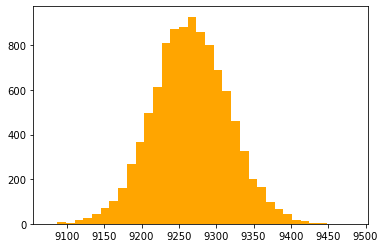

In [31]:
single_expense_mean = df[df['Marital_Status'] == 0]
sample = 10000
n = 10000
single_means = []
for i in range(n):
    single_mean = single_expense_mean.sample(sample, replace = True)['Purchase'].mean()
    single_means.append(single_mean)
plt.hist(single_means, bins=35, color = 'orange')

# Assumption Occupation is in Descending Order means 0 is higher post and 20 is lower grade Occupation
# Occupation from 0-7 are major contributer in sales 


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

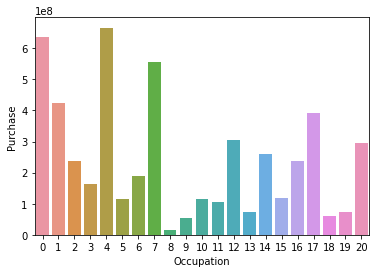

In [39]:
sns.barplot(x = d['Occupation'], y = d['Purchase'])

# Recommendations

### Womens are buying much less in comparision to men so walmart should give purchase coupons or some lucrative offers to women customers
### Apart from age window 26-35 age brcakets like 18-25 & 36-45 also having potential buyers so we can target these two groups by observing their buying patterns for better result
### walmart can give discounts to people not belonging to heigher Occupation that is belongs to Occupation above 7 discounts will enhance their purchasing power
### Married are contributing less in comparision to singles so walmart should recommend married people with mails which shows more and more household products 